# Predicting Codons using the trained Encoder model

In [1]:
%load_ext autoreload
%autoreload

import sys
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

sys.path.append('../scripts')
import ml_helper as mlh
import ml_evaluation as mle
import encoder as e
import Classifier as Classifier
import Baseline_classifiers as bc

In [2]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

### Data Preparation

In [3]:
organism = "E.Coli"
e.set_organism(organism)

Länge train_dataset: 3555
Länge valid_dataset: 420
Länge test df: 386


## Load trained model

In [4]:
class PositionalEncoding(e.PositionalEncoding):
    pass

class EncoderClassifier(e.EncoderClassifier):
    pass

In [5]:
EMBED_DIM = 64
NUM_ENCODER_LAYERS = 2
NUM_HEADS = 4
DROPOUT = 0.5

model = e.EncoderClassifier(
    embed_dim=EMBED_DIM,
    num_layers=NUM_ENCODER_LAYERS,
    num_heads=NUM_HEADS,
    dropout=DROPOUT,
    pos_enc=False
).to(device)


In [6]:
model = mlh.load_model('encoder_64em_2l_4h_05dr', organism, device=device)

Model loaded: 20240603143927_encoder_64em_2l_4h_05dr_21ep.pt


## Results Hyperparameter Tuning

### E.Coli

In [72]:
organism = "E.Coli"
e.set_organism(organism)

Länge train_dataset: 3555
Länge valid_dataset: 420
Länge test df: 386


In [69]:
accuracies = {}

#### Dropout

In [65]:
%autoreload

In [70]:
EMBED_DIM = [256]
NUM_ENCODER_LAYERS = [4]
NUM_HEADS = [4]
dropouts = [0.1, 0.2, 0.3, 0.4, 0.5]
POS_ENC = [False]
accuracies = e.eval_hyperparameter_training(accuracies, EMBED_DIM, NUM_ENCODER_LAYERS, NUM_HEADS, dropouts, POS_ENC)

['20240603144534_encoder_64em_8l_4h_05dr_12ep.pt', '20240603142405_encoder_256em_4l_4h_01dr_16ep.pt', '20240603142704_encoder_256em_4l_4h_04dr_16ep.pt', '20240603142505_encoder_256em_4l_4h_02dr_16ep.pt', '20240603143309_encoder_128em_4l_4h_05dr_8ep.pt', '20240603142803_encoder_256em_4l_4h_05dr_16ep.pt', '20240603144358_encoder_64em_8l_1h_05dr_20ep.pt', '20240603143851_encoder_64em_2l_1h_05dr_21ep.pt', '20240603143903_encoder_64em_2l_2h_05dr_12ep.pt', '20240603144728_encoder_64em_8l_8h_05dr_20ep.pt', '20240603143816_encoder_64em_1l_2h_05dr_8ep.pt', '20240603144442_encoder_64em_8l_2h_05dr_12ep.pt', '20240603142604_encoder_256em_4l_4h_03dr_16ep.pt', '20240603143811_encoder_64em_1l_1h_05dr_8ep.pt', '20240603145400_encoder_64em_2l_4h_posenc_05dr_13ep.pt', '20240603144101_encoder_64em_4l_2h_05dr_19ep.pt', '20240603144025_encoder_64em_4l_1h_05dr_20ep.pt', '20240603143558_encoder_512em_4l_4h_05dr_16ep.pt', '20240603143951_encoder_64em_2l_8h_05dr_16ep.pt', '20240603143821_encoder_64em_1l_4h_05d

#### Embedding Dimension

In [38]:
embed_dims = [16, 32, 64, 128, 256, 512]
NUM_ENCODER_LAYERS = [4]
NUM_HEADS = [4]
DROPOUTS = [0.5]
POS_ENC = [False]
accuracies = e.eval_hyperparameter_training(accuracies, embed_dims, NUM_ENCODER_LAYERS, NUM_HEADS, DROPOUTS, POS_ENC)

Model loaded: 20240603143100_encoder_16em_4l_4h_05dr_18ep.pt
Model used max bias codon for 94.67% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5196 - Organism: E.Coli, Encoder Model - Parameters: 16 embedding dim, 4 layers, 4 heads
Took 4.73 seconds

Model loaded: 20240603143205_encoder_32em_4l_4h_05dr_31ep.pt
Model used max bias codon for 97.43% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5228 - Organism: E.Coli, Encoder Model - Parameters: 32 embedding dim, 4 layers, 4 heads
Took 4.67 seconds

Model loaded: 20240603143249_encoder_64em_4l_4h_05dr_20ep.pt
Model used max bias codon for 94.01% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5262 - Organism: E.Coli, Encoder Model - Parameters: 64 embedding dim, 4 layers, 4 heads
Took 4.74 seconds

Model loaded: 20240603143309_encoder_128em_4l_4h_05dr_8ep.pt
Model used max bias codon for 95.48% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5227 - Organism:

#### Number Encoder Layers and Heads

In [39]:
EMBED_DIM = [64]
num_encoder_layers = [1, 2, 4, 8]
num_heads = [1, 2, 4, 8]
DROPOUTS = [0.5]
POS_ENC = [False]
accuracies = e.eval_hyperparameter_training(accuracies, EMBED_DIM, num_encoder_layers, num_heads, DROPOUTS, POS_ENC)

/home/mkuehn/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Model loaded: 20240603143811_encoder_64em_1l_1h_05dr_8ep.pt
Model used max bias codon for 99.54% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5186 - Organism: E.Coli, Encoder Model - Parameters: 64 embedding dim, 1 layers, 1 heads
Took 4.59 seconds

Model loaded: 20240603143816_encoder_64em_1l_2h_05dr_8ep.pt
Model used max bias codon for 99.36% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.519 - Organism: E.Coli, Encoder Model - Parameters: 64 embedding dim, 1 layers, 2 heads
Took 4.6 seconds

Model loaded: 20240603143821_encoder_64em_1l_4h_05dr_8ep.pt
Model used max bias codon for 99.33% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5198 - Organism: E.Coli, Encoder Model - Parameters: 64 embedding dim, 1 layers, 4 heads
Took 4.6 seconds

Model loaded: 20240603143832_encoder_64em_1l_8h_05dr_15ep.pt
Model used max bias codon for 94.08% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5226 - Organism: E.Col

#### Positional Encoding

In [47]:
EMBED_DIM = [64]
NUM_ENCODER_LAYERS = [2]
NUM_HEADS = [4]
DROPOUTS = [0.5]
pos_enc = [True, False]
accuracies = e.eval_hyperparameter_training(accuracies, EMBED_DIM, NUM_ENCODER_LAYERS, NUM_HEADS, DROPOUTS, pos_enc)

Model loaded: 20240603145400_encoder_64em_2l_4h_05dr_posenc_13ep.pt
Model used max bias codon for 97.97% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5194 - Organism: E.Coli, Encoder Model - Parameters: 64 embedding dim, 2 layers, 4 heads
Took 4.68 seconds

------
{'encoder_256em_4l_4h_01dr': 0.521, 'encoder_256em_4l_4h_02dr': 0.5205, 'encoder_256em_4l_4h_03dr': 0.5207, 'encoder_256em_4l_4h_04dr': 0.5212, 'encoder_256em_4l_4h_05dr': 0.5215, 'encoder_16em_4l_4h_05dr': 0.5196, 'encoder_32em_4l_4h_05dr': 0.5228, 'encoder_64em_4l_4h_05dr': 0.5262, 'encoder_128em_4l_4h_05dr': 0.5227, 'encoder_512em_4l_4h_05dr': 0.5099, 'encoder_64em_1l_1h_05dr': 0.5186, 'encoder_64em_1l_2h_05dr': 0.519, 'encoder_64em_1l_4h_05dr': 0.5198, 'encoder_64em_1l_8h_05dr': 0.5226, 'encoder_64em_2l_1h_05dr': 0.5263, 'encoder_64em_2l_2h_05dr': 0.5241, 'encoder_64em_2l_4h_05dr': 0.5264, 'encoder_64em_2l_8h_05dr': 0.5258, 'encoder_64em_4l_1h_05dr': 0.5258, 'encoder_64em_4l_2h_05dr': 0.5253, 'encode

#### Save E.Coli accuracies

In [48]:
mlh.to_pickle(accuracies, f"../data/{organism}/encoder_accuracies.pkl")

In [49]:
accuracies = mlh.from_pickle(f"../data/{organism}/encoder_accuracies.pkl")

In [50]:
accuracies

{'encoder_256em_4l_4h_01dr': 0.521,
 'encoder_256em_4l_4h_02dr': 0.5205,
 'encoder_256em_4l_4h_03dr': 0.5207,
 'encoder_256em_4l_4h_04dr': 0.5212,
 'encoder_256em_4l_4h_05dr': 0.5215,
 'encoder_16em_4l_4h_05dr': 0.5196,
 'encoder_32em_4l_4h_05dr': 0.5228,
 'encoder_64em_4l_4h_05dr': 0.5262,
 'encoder_128em_4l_4h_05dr': 0.5227,
 'encoder_512em_4l_4h_05dr': 0.5099,
 'encoder_64em_1l_1h_05dr': 0.5186,
 'encoder_64em_1l_2h_05dr': 0.519,
 'encoder_64em_1l_4h_05dr': 0.5198,
 'encoder_64em_1l_8h_05dr': 0.5226,
 'encoder_64em_2l_1h_05dr': 0.5263,
 'encoder_64em_2l_2h_05dr': 0.5241,
 'encoder_64em_2l_4h_05dr': 0.5264,
 'encoder_64em_2l_8h_05dr': 0.5258,
 'encoder_64em_4l_1h_05dr': 0.5258,
 'encoder_64em_4l_2h_05dr': 0.5253,
 'encoder_64em_4l_8h_05dr': 0.5251,
 'encoder_64em_8l_1h_05dr': 0.5252,
 'encoder_64em_8l_2h_05dr': 0.5235,
 'encoder_64em_8l_4h_05dr': 0.523,
 'encoder_64em_8l_8h_05dr': 0.5253,
 'encoder_64em_2l_4h_05dr_posenc': 0.5194}

--> Best suited parameters: encoder_64em_2l_4h_05dr - Accuracy: 0.5264

#### Baseline Classifier

In [73]:
bc.get_max_cub_accuracy(e.organism, e.df, e.usage_biases)

Organismus E.Coli - Accuracy: 0.5186


#### Shuffled Data

In [78]:
%autoreload

In [79]:
organism = "E.Coli"
e.load_shuffled_data()

Länge train_dataset: 3555
Länge valid_dataset: 420
Länge test df: 386


In [80]:
EMBED_DIM = 64
NUM_ENCODER_LAYERS = 2
NUM_HEADS = 4
DROPOUT = 0.5
POS_ENC = False
e.eval_parameter_model(EMBED_DIM, NUM_ENCODER_LAYERS, NUM_HEADS, DROPOUT, POS_ENC)

../ml_models/E.Coli/20240603143927_encoder_64em_2l_4h_05dr_21ep.pt
Model loaded: 20240603143927_encoder_64em_2l_4h_05dr_21ep.pt
Model used max bias codon for 93.05% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5258 - Organism: E.Coli, Encoder Model - Parameters: 64 embedding dim, 2 layers, 4 heads
Took 4.76 seconds



0.5258

### Drosophila.Melanogaster

In [81]:
organism = "Drosophila.Melanogaster"
e.set_organism(organism)

Länge train_dataset: 33040
Länge valid_dataset: 4073
Länge test df: 2168


In [55]:
accuracies = {}

In [56]:
embed_dims = [64, 128]
num_encoder_layers = [2, 4]
num_heads = [2, 4]
DROPOUTS = [0.2, 0.5]
POS_ENC = [False]
accuracies = e.eval_hyperparameter_training(accuracies, embed_dims, num_encoder_layers, num_heads, DROPOUTS, POS_ENC)

Model loaded: 20240603150541_encoder_64em_2l_2h_02dr_10ep.pt
Model used max bias codon for 56.96% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.4986 - Organism: Drosophila.Melanogaster, Encoder Model - Parameters: 64 embedding dim, 2 layers, 2 heads
Took 56.4 seconds

Model loaded: 20240603150712_encoder_64em_2l_2h_05dr_10ep.pt
Model used max bias codon for 57.40% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.4981 - Organism: Drosophila.Melanogaster, Encoder Model - Parameters: 64 embedding dim, 2 layers, 2 heads
Took 56.68 seconds

Model loaded: 20240603150858_encoder_64em_2l_4h_02dr_10ep.pt
Model used max bias codon for 56.39% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.4986 - Organism: Drosophila.Melanogaster, Encoder Model - Parameters: 64 embedding dim, 2 layers, 4 heads
Took 56.66 seconds

Model loaded: 20240603151045_encoder_64em_2l_4h_05dr_10ep.pt
Model used max bias codon for 56.84% of possible codon predictions


In [69]:
# Test best model, trained for longer
embed_dims = [64]
num_encoder_layers = [4]
num_heads = [4]
DROPOUTS = [0.2]
POS_ENC = [False, True]
accuracies = e.eval_hyperparameter_training(accuracies, embed_dims, num_encoder_layers, num_heads, DROPOUTS, POS_ENC)

Model loaded: 20240603163741_encoder_64em_4l_4h_posenc_02dr_50ep.pt
Model used max bias codon for 78.75% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5101 - Organism: Drosophila.Melanogaster, Encoder Model - Parameters: 64 embedding dim, 4 layers, 4 heads
Took 57.55 seconds

------
{'encoder_64em_2l_2h_02dr': 0.4986, 'encoder_64em_2l_2h_05dr': 0.4981, 'encoder_64em_2l_4h_02dr': 0.4986, 'encoder_64em_2l_4h_05dr': 0.4982, 'encoder_64em_4l_2h_02dr': 0.4982, 'encoder_64em_4l_2h_05dr': 0.4982, 'encoder_64em_4l_4h_02dr': 0.4988, 'encoder_64em_4l_4h_05dr': 0.4982, 'encoder_128em_2l_2h_02dr': 0.4983, 'encoder_128em_2l_2h_05dr': 0.4986, 'encoder_128em_2l_4h_02dr': 0.4987, 'encoder_128em_2l_4h_05dr': 0.4983, 'encoder_128em_4l_2h_02dr': 0.4981, 'encoder_128em_4l_2h_05dr': 0.4979, 'encoder_128em_4l_4h_02dr': 0.4982, 'encoder_128em_4l_4h_05dr': 0.4978, 'encoder_64em_4l_4h_posenc_02dr': 0.5101}
------
('encoder_64em_4l_4h_posenc_02dr', 0.5101)


#### Save Drosophila.Melanogaster accuracies

In [70]:
mlh.to_pickle(accuracies, f"../data/{organism}/encoder_accuracies.pkl")

In [71]:
accuracies = mlh.from_pickle(f"../data/{organism}/encoder_accuracies.pkl")

In [74]:
accuracies

{'encoder_64em_2l_2h_02dr': 0.4986,
 'encoder_64em_2l_2h_05dr': 0.4981,
 'encoder_64em_2l_4h_02dr': 0.4986,
 'encoder_64em_2l_4h_05dr': 0.4982,
 'encoder_64em_4l_2h_02dr': 0.4982,
 'encoder_64em_4l_2h_05dr': 0.4982,
 'encoder_64em_4l_4h_02dr': 0.4988,
 'encoder_64em_4l_4h_05dr': 0.4982,
 'encoder_128em_2l_2h_02dr': 0.4983,
 'encoder_128em_2l_2h_05dr': 0.4986,
 'encoder_128em_2l_4h_02dr': 0.4987,
 'encoder_128em_2l_4h_05dr': 0.4983,
 'encoder_128em_4l_2h_02dr': 0.4981,
 'encoder_128em_4l_2h_05dr': 0.4979,
 'encoder_128em_4l_4h_02dr': 0.4982,
 'encoder_128em_4l_4h_05dr': 0.4978,
 'encoder_64em_4l_4h_posenc_02dr': 0.5101}

--> Best suited parameters: encoder_64em_4l_4h_posenc_02dr - Accuracy: 0.5101

#### Baseline Classifier

In [82]:
bc.get_max_cub_accuracy(e.organism, e.df, e.usage_biases)

Organismus Drosophila.Melanogaster - Accuracy: 0.4917


#### Shuffled Data

In [84]:
organism = "Drosophila.Melanogaster"
e.load_shuffled_data()

In [85]:
EMBED_DIM = 64
NUM_ENCODER_LAYERS = 4
NUM_HEADS = 4
DROPOUT = 0.2
POS_ENC = True
e.eval_parameter_model(EMBED_DIM, NUM_ENCODER_LAYERS, NUM_HEADS, DROPOUT, POS_ENC)

../ml_models/Drosophila.Melanogaster/20240603163741_encoder_64em_4l_4h_posenc_02dr_50ep.pt
Model loaded: 20240603163741_encoder_64em_4l_4h_posenc_02dr_50ep.pt
Model used max bias codon for 81.49% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.4868 - Organism: Drosophila.Melanogaster, Encoder Model - Parameters: 64 embedding dim, 4 layers, 4 heads
Took 59.16 seconds



0.4868

### Homo.Sapiens

In [34]:
organism = "Homo.Sapiens"
e.set_organism(organism)

9139

In [76]:
accuracies = {}

In [77]:
embed_dims = [64]
num_encoder_layers = [4]
num_heads = [4]
DROPOUTS = [0.2]
POS_ENC = [False, True]
accuracies = e.eval_hyperparameter_training(accuracies, embed_dims, num_encoder_layers, num_heads, DROPOUTS, POS_ENC)

Model loaded: 20240603182243_encoder_64em_4l_4h_02dr_55ep.pt
Model used max bias codon for 54.50% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5106 - Organism: Homo.Sapiens, Encoder Model - Parameters: 64 embedding dim, 4 layers, 4 heads
Took 282.53 seconds

Model loaded: 20240603201950_encoder_64em_4l_4h_posenc_02dr_80ep.pt
Model used max bias codon for 50.25% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.5232 - Organism: Homo.Sapiens, Encoder Model - Parameters: 64 embedding dim, 4 layers, 4 heads
Took 284.51 seconds

------
{'encoder_64em_4l_4h_02dr': 0.5106, 'encoder_64em_4l_4h_posenc_02dr': 0.5232}
------
('encoder_64em_4l_4h_posenc_02dr', 0.5232)


#### Save Homo.Sapiens accuracies

In [78]:
mlh.to_pickle(accuracies, f"../data/{organism}/encoder_accuracies.pkl")

In [79]:
accuracies = mlh.from_pickle(f"../data/{organism}/encoder_accuracies.pkl")

In [80]:
accuracies

{'encoder_64em_4l_4h_02dr': 0.5106, 'encoder_64em_4l_4h_posenc_02dr': 0.5232}

--> Best suited parameters: encoder_64em_4l_4h_posenc_02dr - Accuracy: 0.5232

#### Baseline Classifier

In [81]:
bc.get_max_cub_accuracy(e.organism, e.df, e.usage_biases)

Organismus Homo.Sapiens - Accuracy: 0.438


#### Shuffled Data

In [60]:
organism = "Homo.Sapiens"
e.load_shuffled_data()

9139

In [61]:
EMBED_DIM = 64
NUM_ENCODER_LAYERS = 4
NUM_HEADS = 4
DROPOUT = 0.2
POS_ENC = True
e.eval_parameter_model(EMBED_DIM, NUM_ENCODER_LAYERS, NUM_HEADS, DROPOUT, POS_ENC)

Model loaded: 20240603201950_encoder_64em_4l_4h_posenc_02dr_80ep.pt
Model used max bias codon for 47.29% of possible codon predictions
Replaced 0.00% of codons
Accuracy: 0.4679


# Visualisation

## E.Coli

Länge train_dataset: 3555
Länge valid_dataset: 420
Länge test df: 386
Model loaded: 20240611133239_encoder_256em_4l_4h_03dr_16ep.pt
Model used max bias codon for 82.44% of possible codon predictions
Replaced 0.00% of codons
predicted different classes:  40 out of: 61
predicted following classes:  {'AGA', 'ATC', 'GAA', 'GTG', 'AAC', 'ATT', 'CAG', 'TCA', 'CGT', 'GTT', 'AAT', 'GAC', 'ATG', 'TGG', 'ACA', 'CGC', 'TTT', 'CAC', 'GGC', 'GCT', 'CAA', 'AAA', 'TAC', 'TCT', 'TTC', 'CCA', 'TGT', 'GCA', 'CTG', 'GGT', 'ACC', 'AGC', 'CCG', 'ACT', 'TTA', 'TGC', 'CAT', 'TAT', 'GCG', 'GAT'}


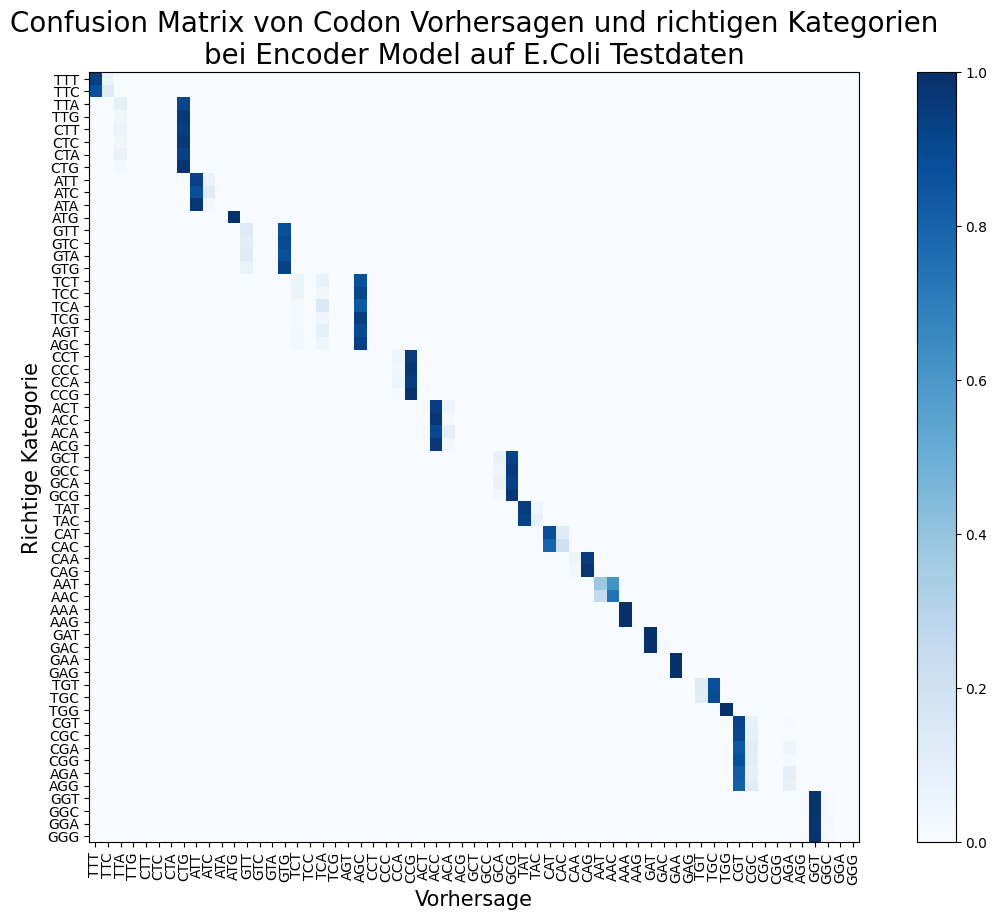

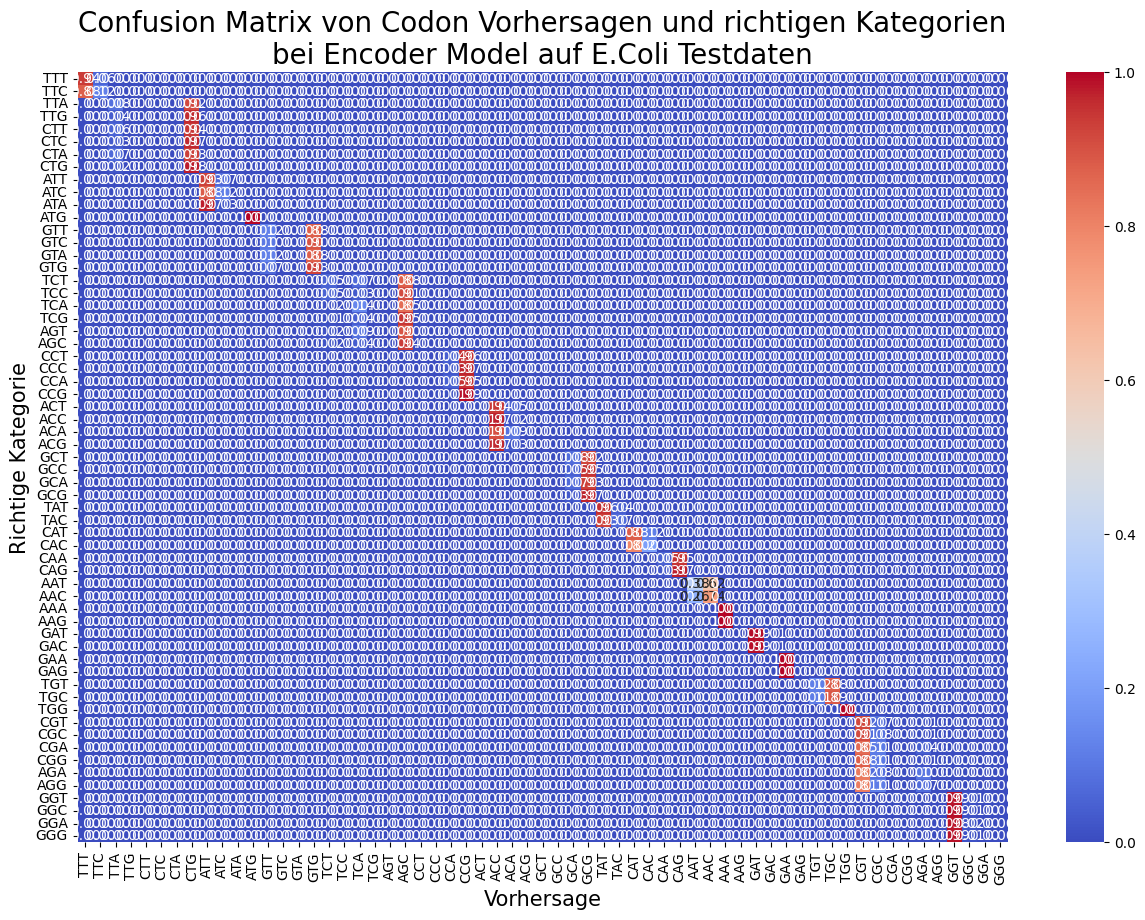

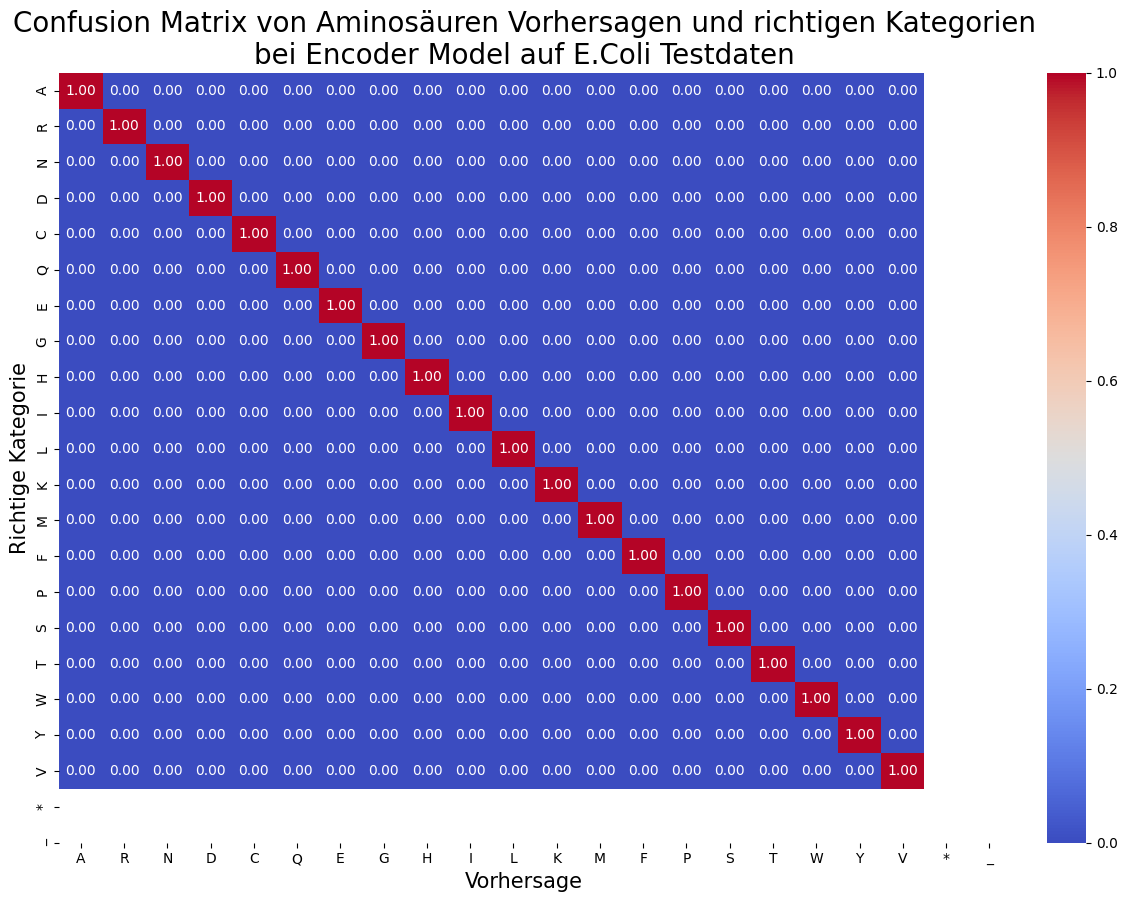

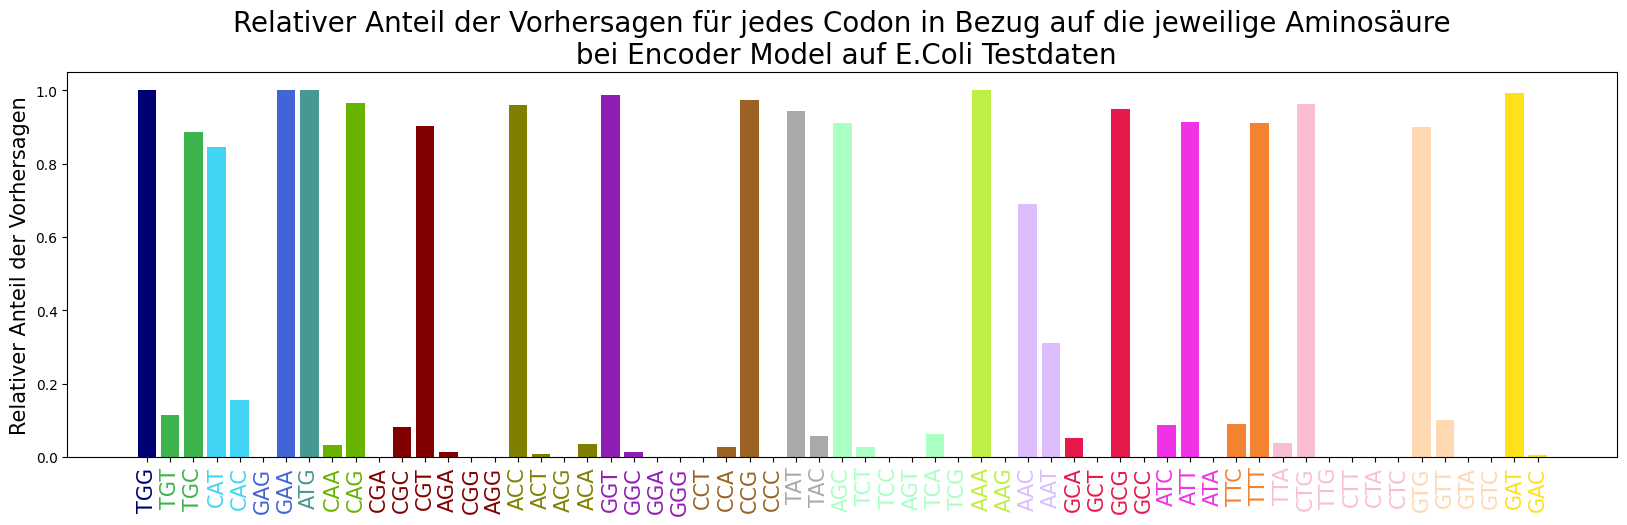

{'ATG': 3365, 'CGA': 0, 'CAT': 1376, 'CCT': 0, 'TTA': 136, 'GTG': 2855, 'GGT': 3026, 'AAC': 2021, 'TGG': 1761, 'AAA': 4148, 'CTG': 6266, 'GGC': 30, 'AGC': 1776, 'CGC': 202, 'CAC': 233, 'GTT': 278, 'GAG': 0, 'TCT': 60, 'CGT': 2366, 'GCA': 170, 'GCT': 3, 'TGT': 66, 'GCG': 3854, 'ATC': 364, 'CCA': 47, 'CCG': 2743, 'GAA': 4742, 'TAT': 1804, 'GAT': 3814, 'AAG': 0, 'CAA': 90, 'GAC': 19, 'TCC': 0, 'TTC': 255, 'ACC': 2801, 'CAG': 3406, 'TAC': 107, 'ACT': 9, 'TGC': 665, 'AAT': 795, 'GTA': 0, 'ATT': 3394, 'TTT': 2456, 'GCC': 0, 'TTG': 0, 'CTT': 0, 'ATA': 0, 'AGA': 21, 'GTC': 0, 'AGT': 0, 'ACG': 0, 'CGG': 0, 'TCA': 115, 'CTA': 0, 'CTC': 0, 'ACA': 69, 'AGG': 0, 'GGA': 0, 'TCG': 0, 'CCC': 0, 'GGG': 0}


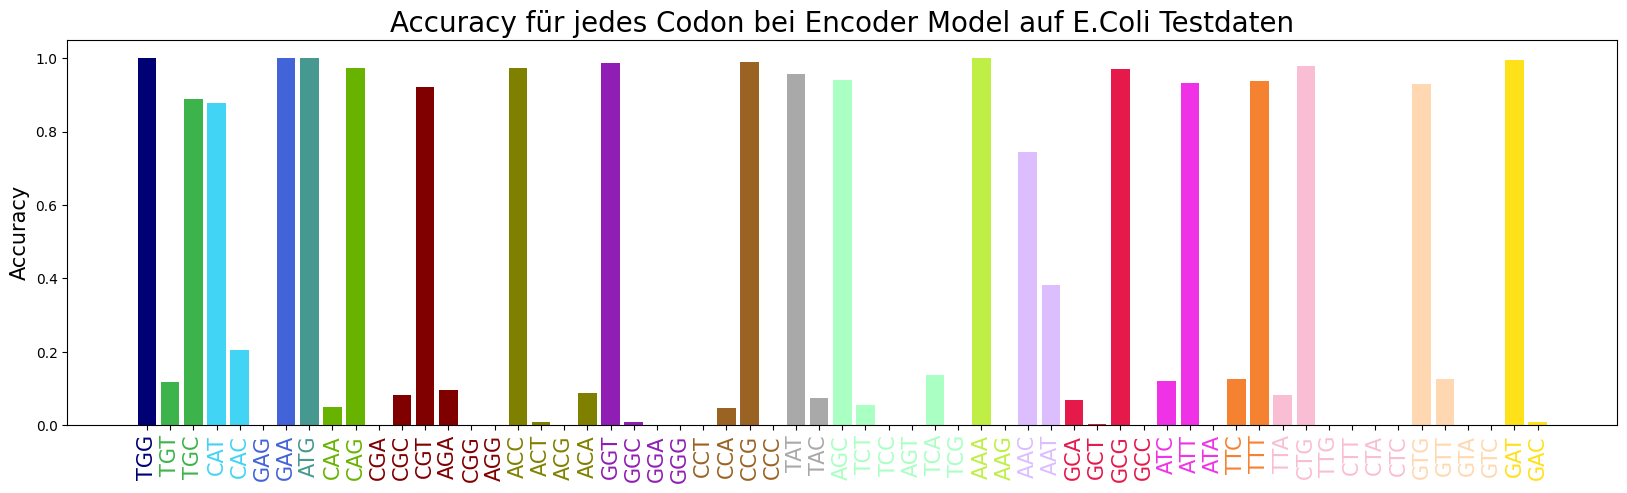

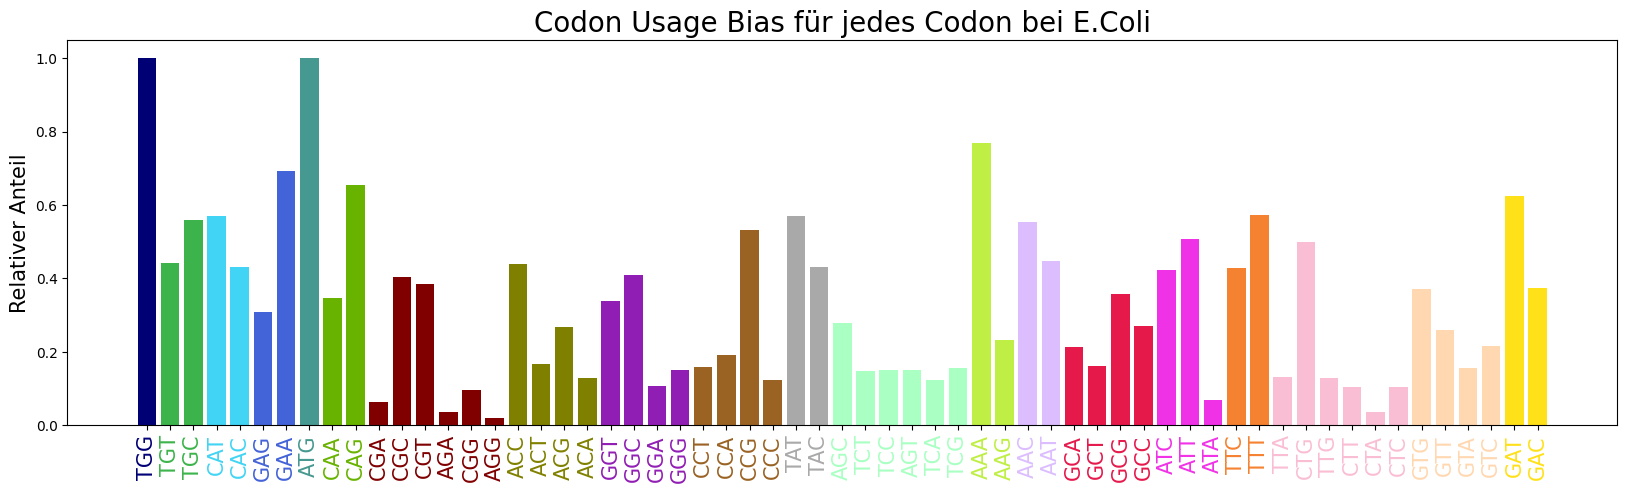

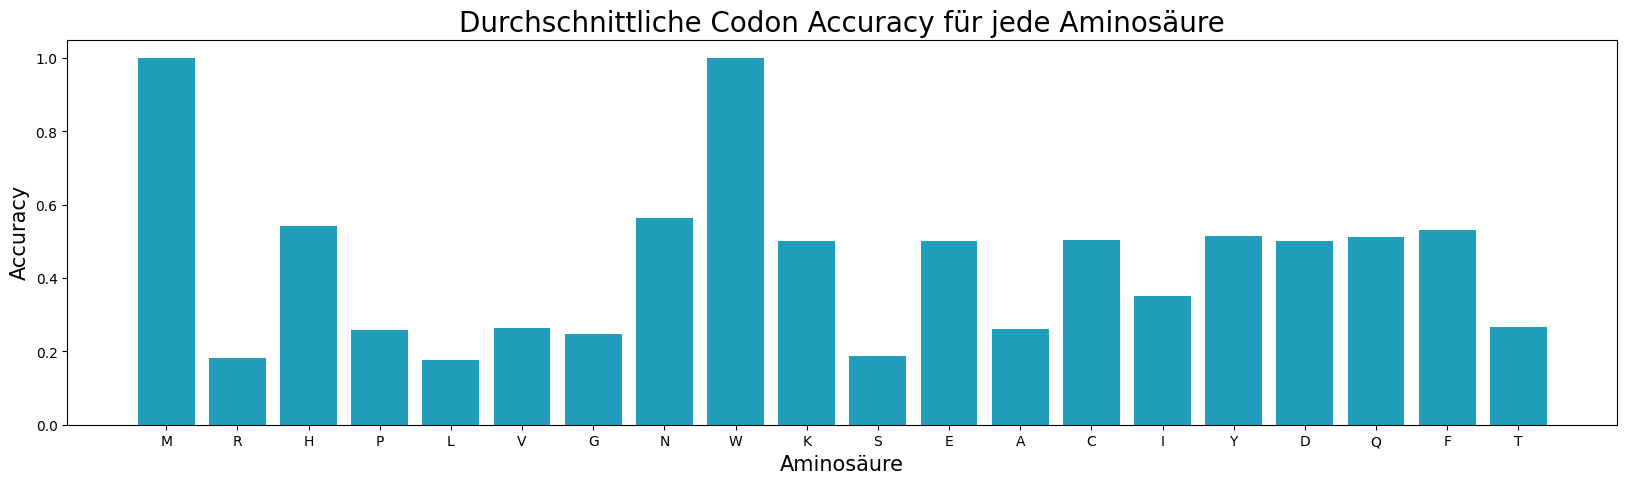

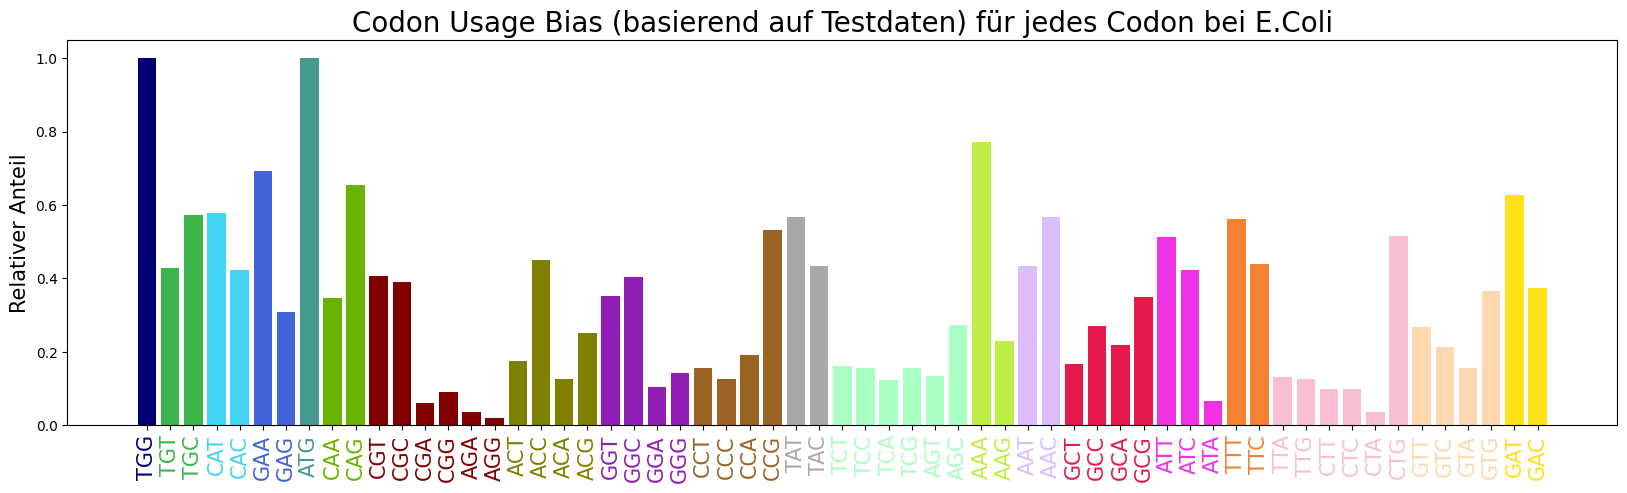

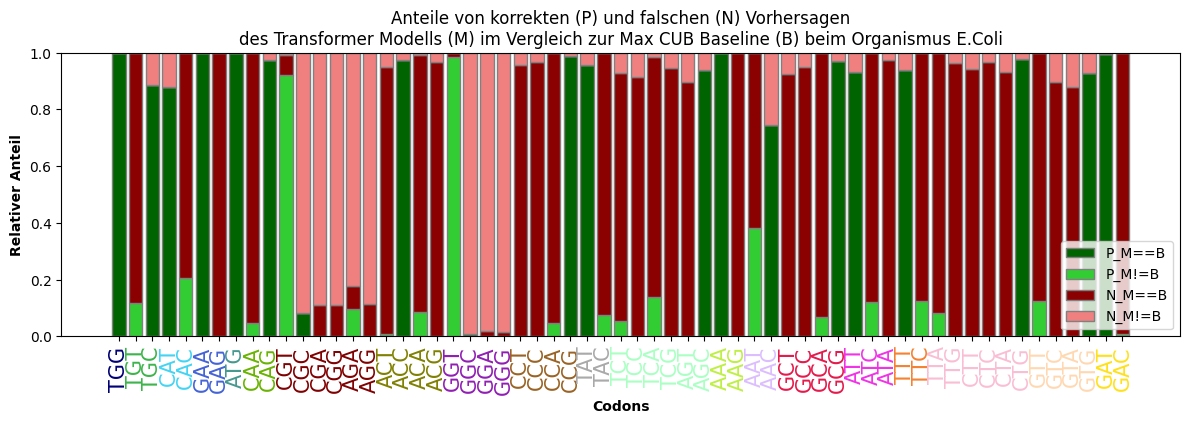

In [149]:
%run ./Encoder_Result_Visualisation.ipynb

## Fruchtfliege

Länge train_dataset: 33040
Länge valid_dataset: 4073
Länge test df: 2168
Model loaded: 20240603163741_encoder_64em_4l_4h_posenc_02dr_50ep.pt
Model used max bias codon for 78.75% of possible codon predictions
Replaced 0.00% of codons
predicted different classes:  61 out of: 61


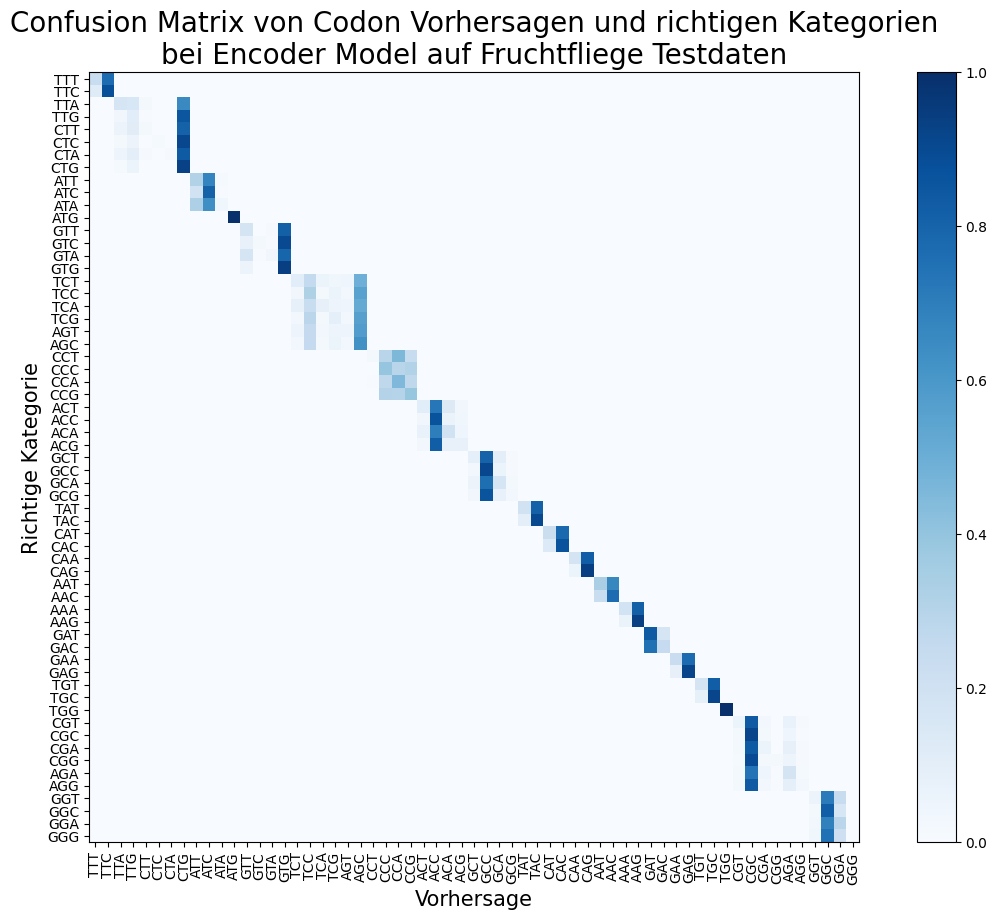

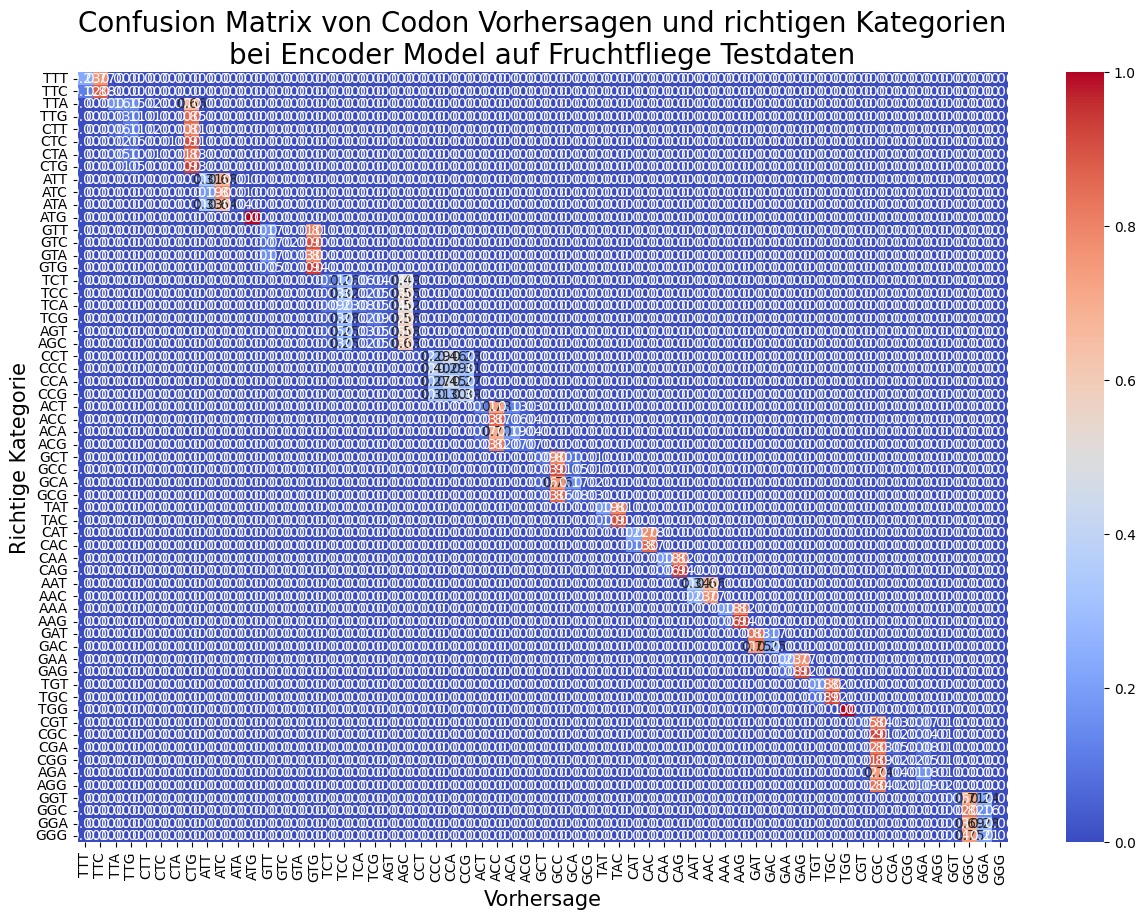

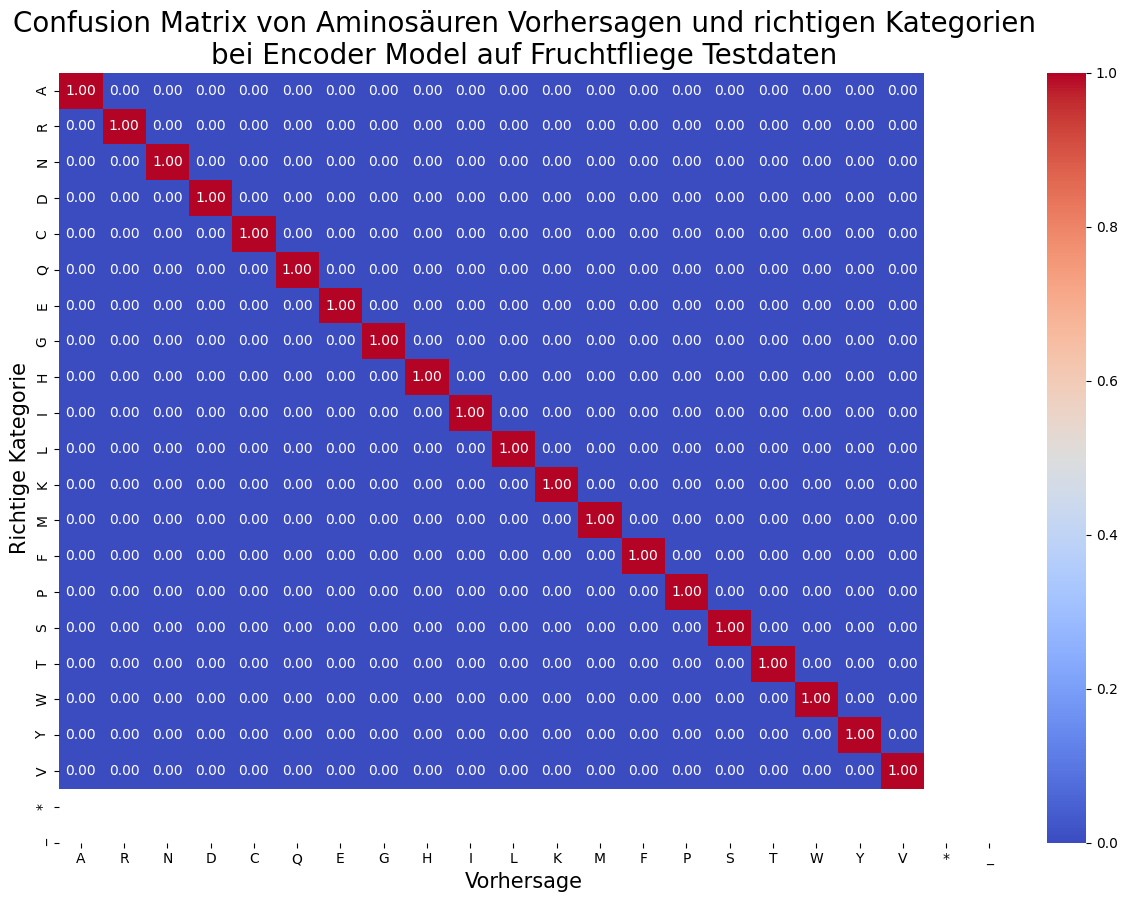

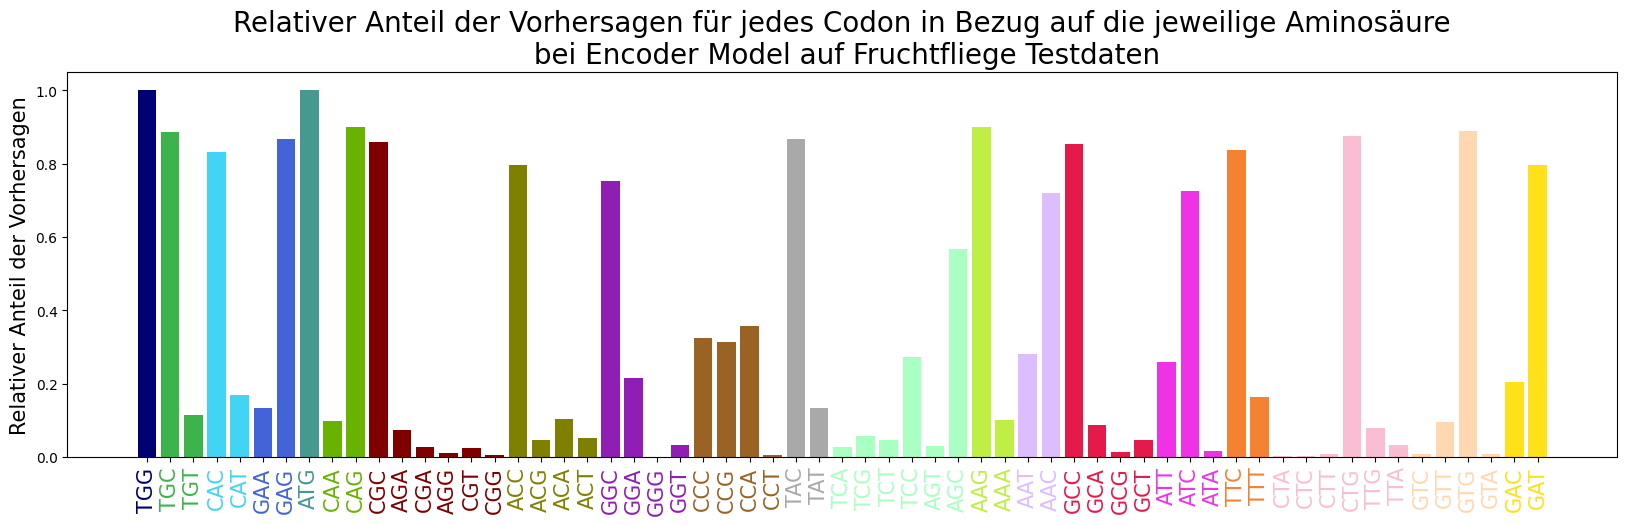

{'ATG': 33487, 'GAA': 7303, 'CGC': 23301, 'CAA': 4361, 'GCC': 42617, 'CTA': 115, 'GAC': 8527, 'TCA': 1004, 'TCG': 2173, 'TCT': 1143, 'CTC': 247, 'TAC': 23071, 'GTC': 454, 'TCC': 9092, 'AAT': 10937, 'CCC': 10771, 'CAG': 49727, 'CCG': 9605, 'CAC': 19641, 'ACC': 26730, 'GGC': 31132, 'CTT': 290, 'ACG': 1580, 'TTC': 26864, 'TAT': 3041, 'GCA': 3172, 'ACA': 3277, 'ACT': 1580, 'CCA': 10031, 'AGT': 819, 'CTG': 49327, 'AGA': 1408, 'ATT': 7565, 'GTT': 2876, 'CGA': 657, 'TGC': 18839, 'GGA': 7558, 'ATC': 25375, 'GTG': 36659, 'ATA': 540, 'GCG': 610, 'AAG': 50256, 'AAA': 4434, 'GTA': 328, 'GAG': 55368, 'GGG': 21, 'GAT': 33997, 'AGG': 222, 'CAT': 3426, 'AGC': 18974, 'TTG': 2417, 'AAC': 29115, 'TGG': 13922, 'CGT': 691, 'GCT': 1807, 'TGT': 1746, 'TTA': 1173, 'CGG': 184, 'GGT': 1111, 'TTT': 4412, 'CCT': 219}


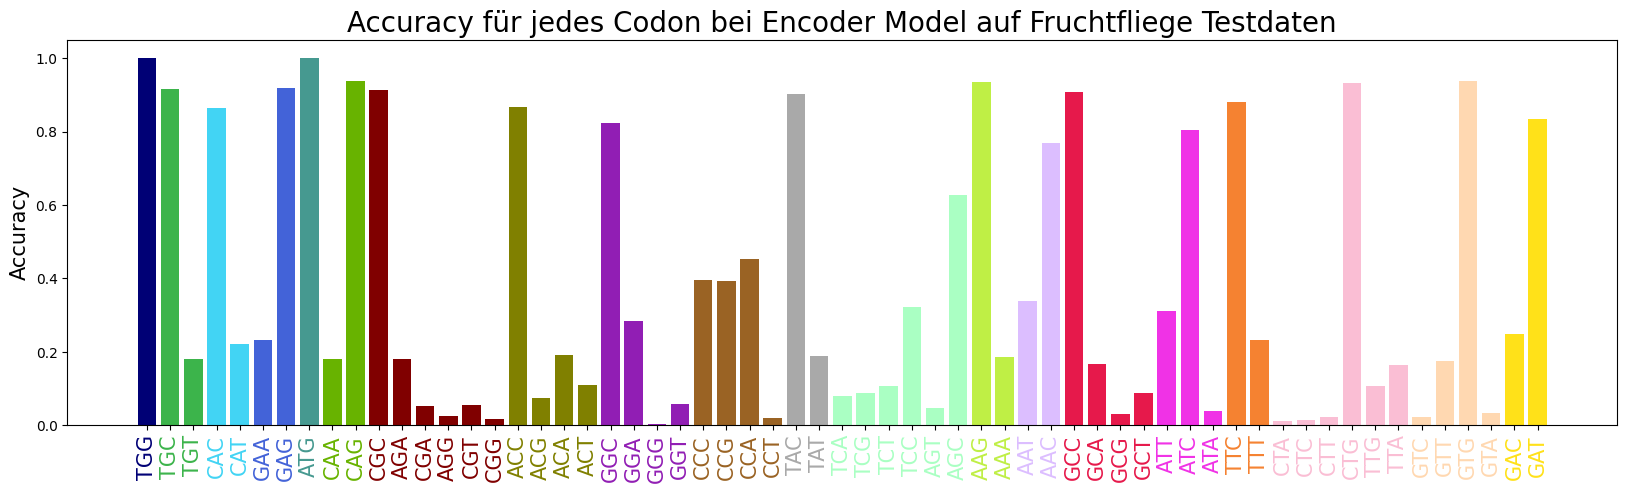

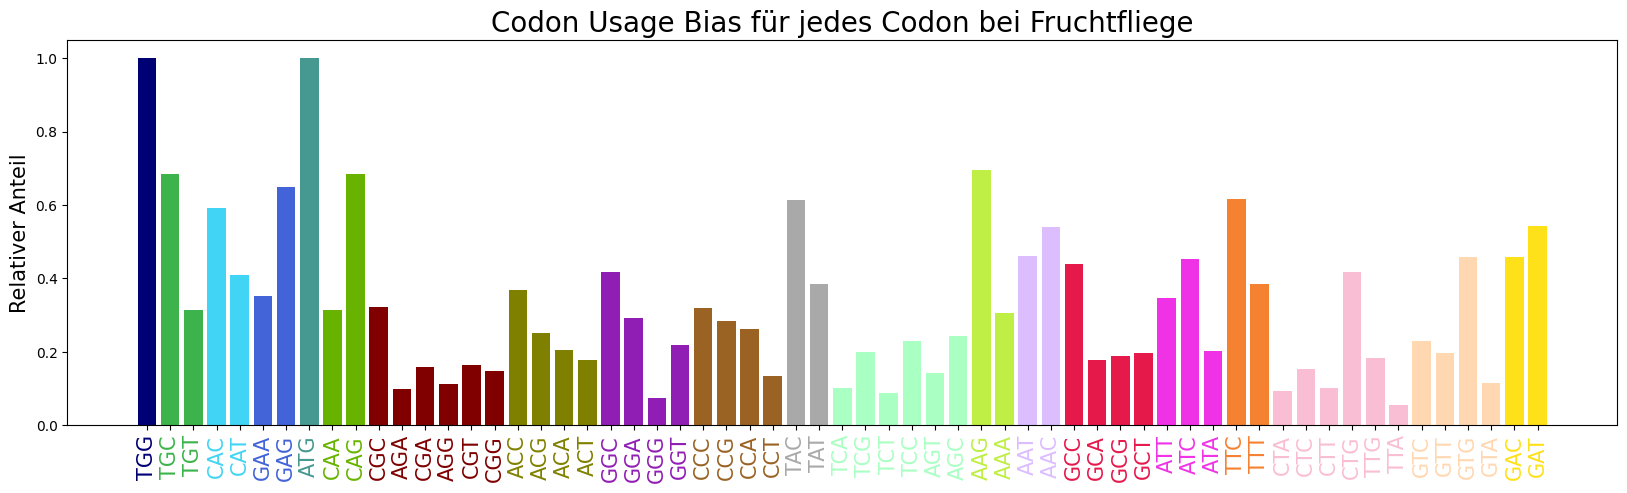

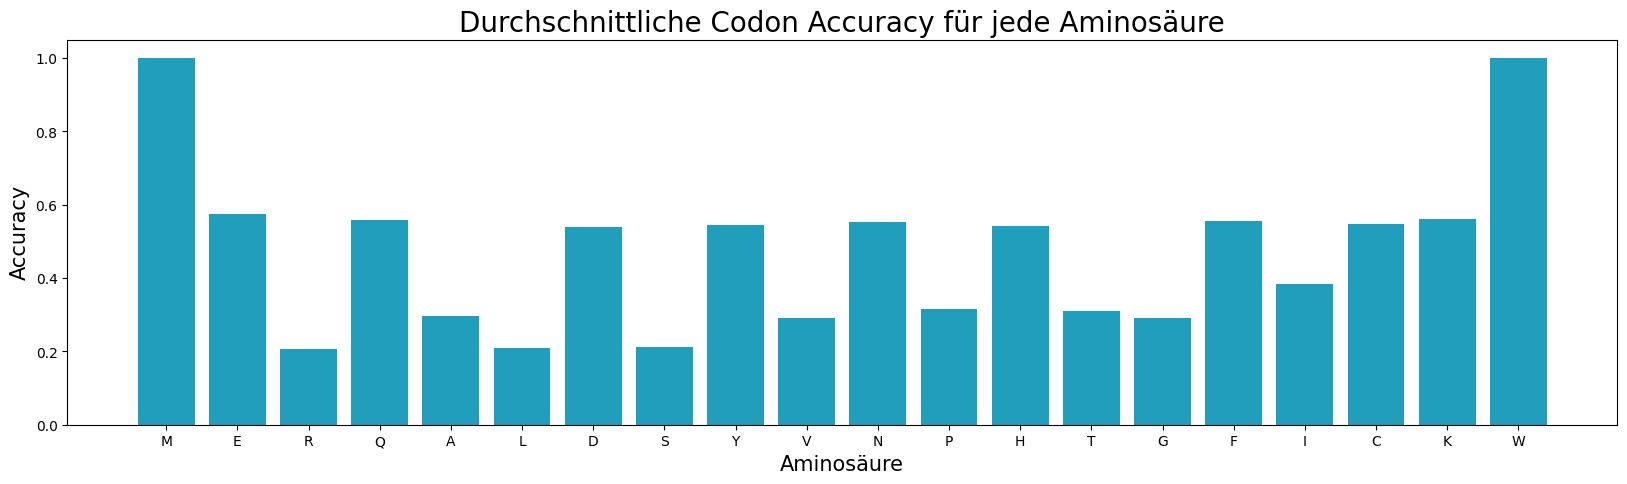

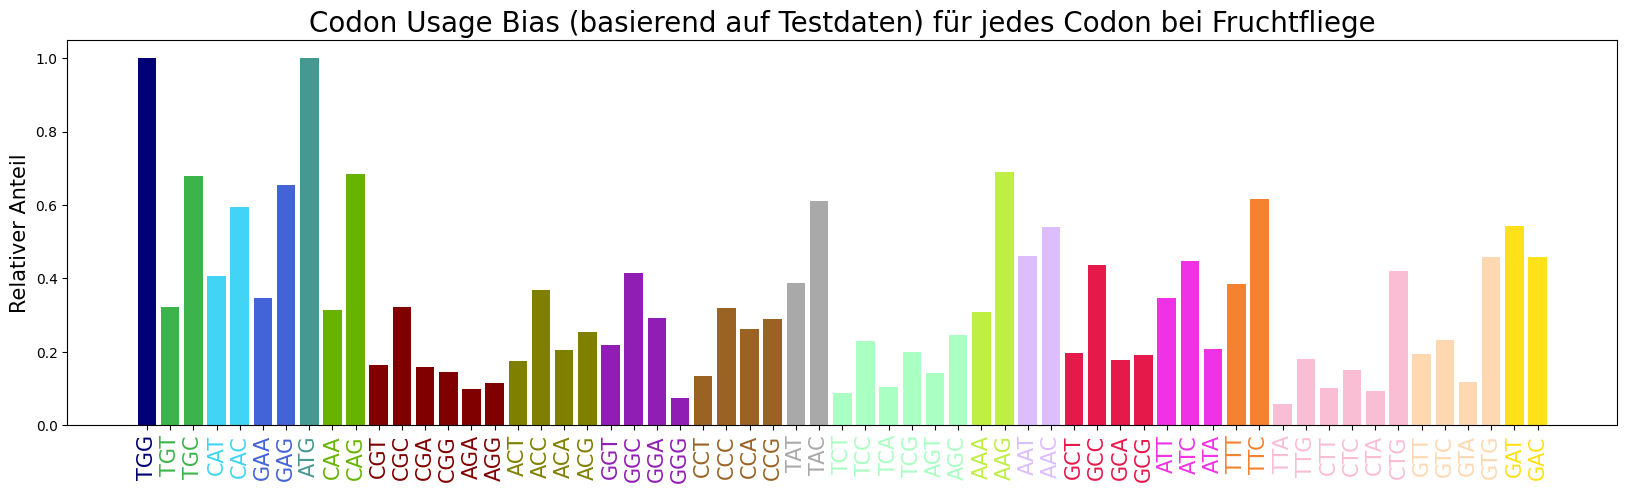

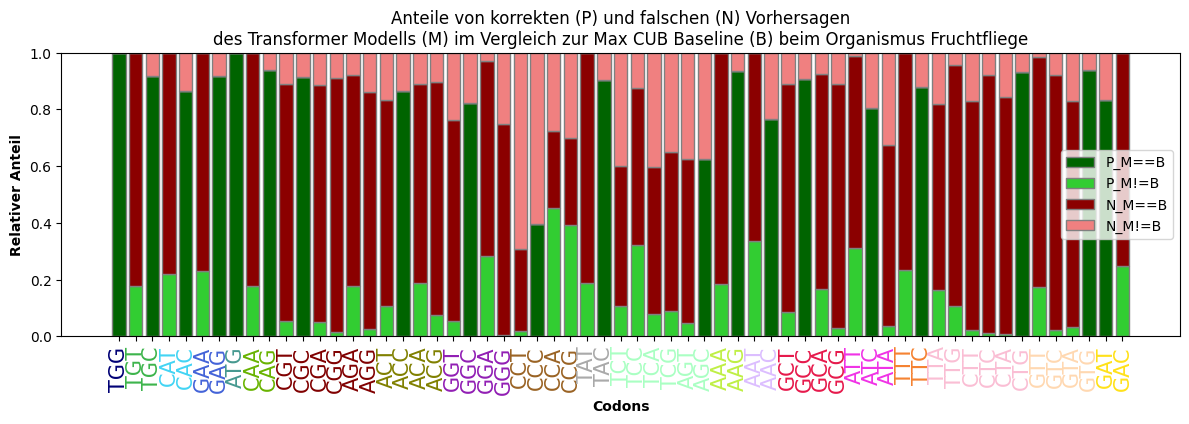

In [151]:
%run ./Encoder_Result_Visualisation.ipynb

## Mensch

Länge train_dataset: 140711
Länge valid_dataset: 17784
Länge test df: 9139
Model loaded: 20240603201950_encoder_64em_4l_4h_posenc_02dr_80ep.pt
Model used max bias codon for 50.93% of possible codon predictions
Replaced 0.00% of codons
predicted different classes:  61 out of: 61


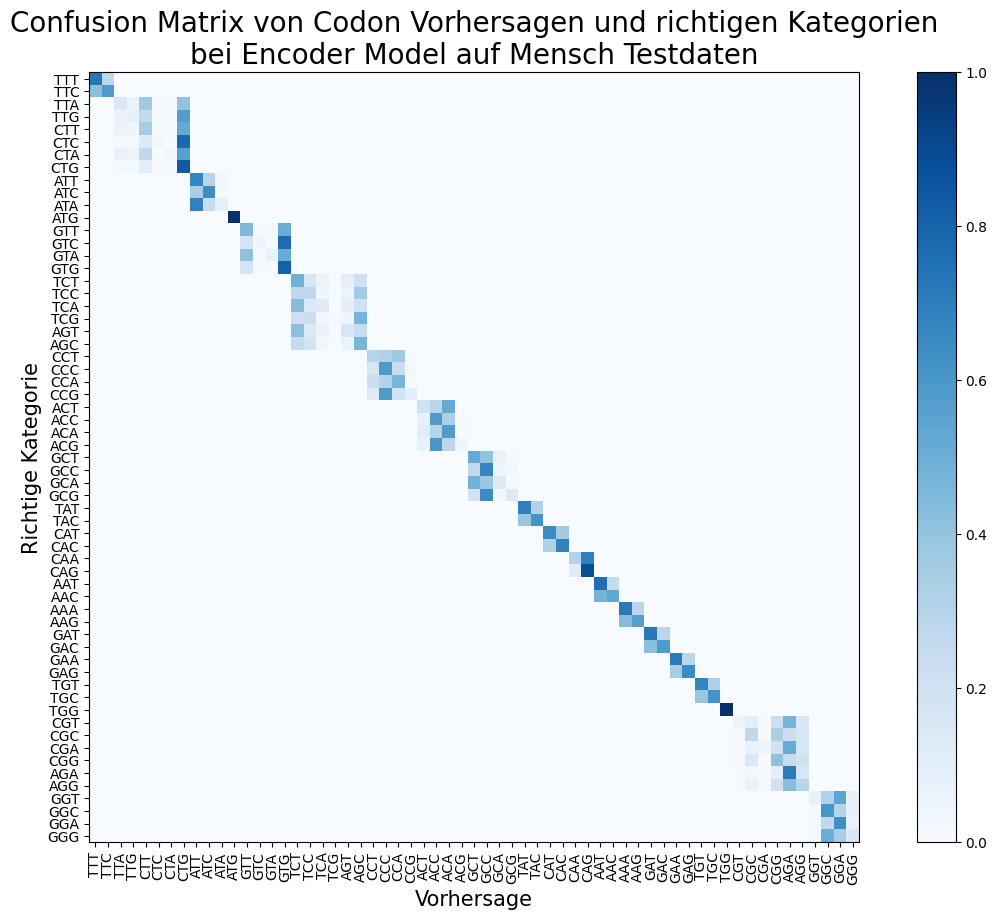

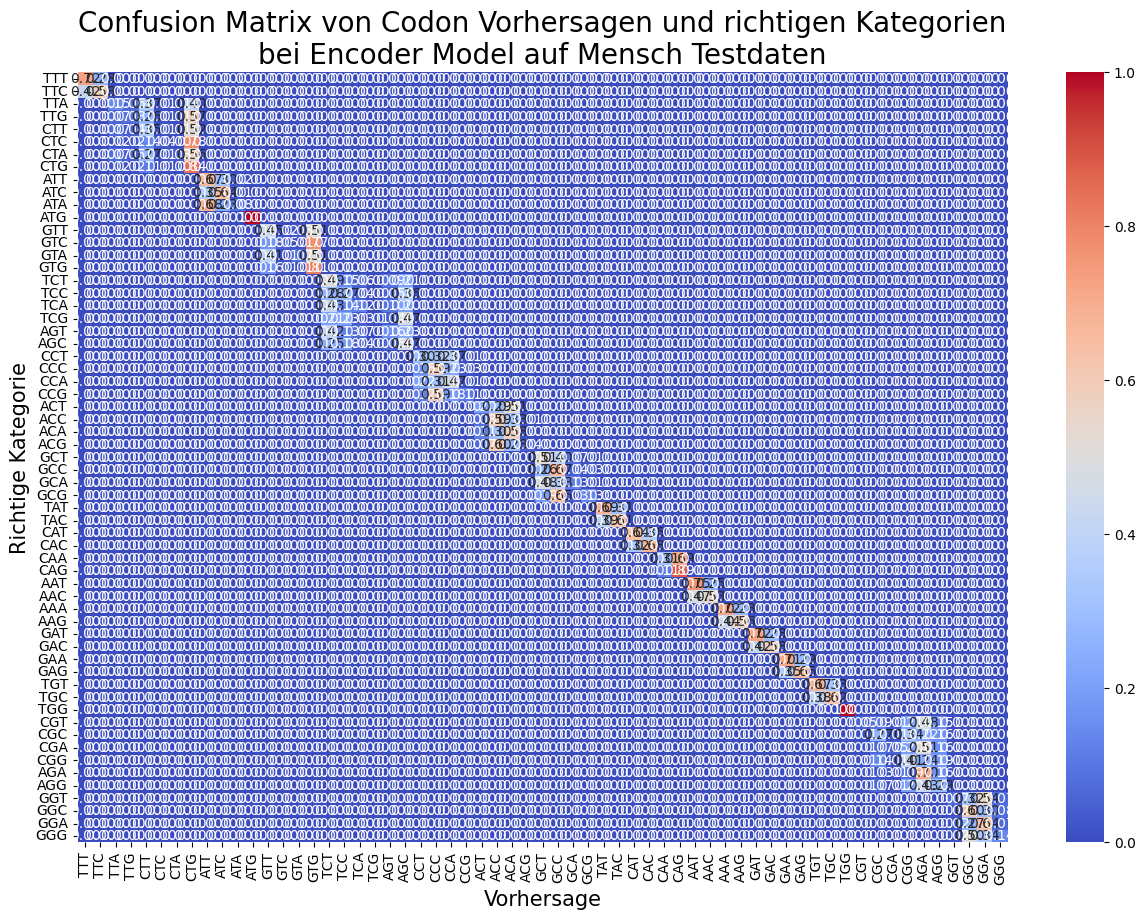

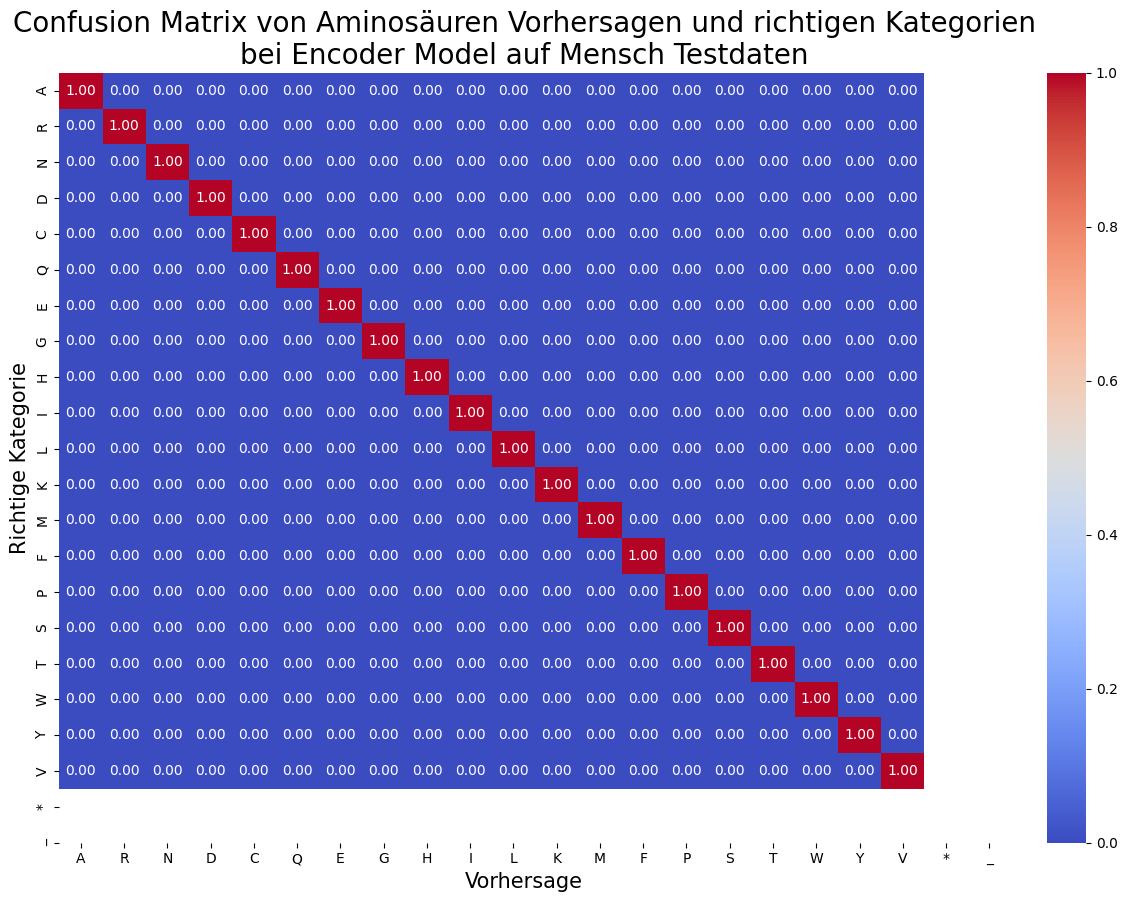

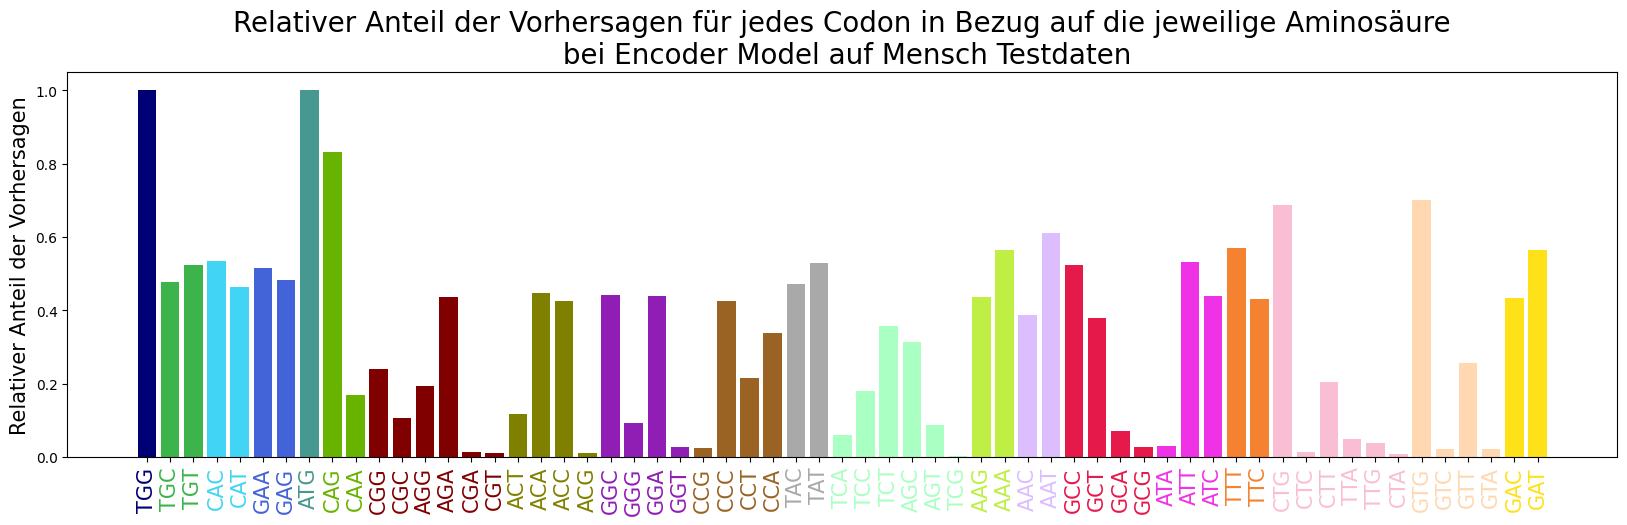

{'ATG': 137692, 'GAA': 155434, 'CGG': 29574, 'CAC': 63117, 'CAG': 205822, 'CCG': 4460, 'CTG': 199304, 'GCC': 113961, 'CAA': 27525, 'GGC': 78501, 'TCA': 11436, 'GCT': 62525, 'GGG': 14292, 'ACT': 17995, 'CCC': 73963, 'TAC': 52797, 'CCT': 37296, 'TCC': 30603, 'TCT': 53502, 'CTC': 4117, 'CGC': 15661, 'TGC': 42592, 'AGC': 60770, 'AAG': 118001, 'AGG': 22973, 'AGT': 14601, 'GAG': 169201, 'TTT': 78423, 'GAC': 93057, 'AAA': 125652, 'ATA': 4183, 'AGA': 60151, 'ATT': 70553, 'CCA': 57366, 'CTT': 31510, 'AAC': 62447, 'GCA': 14154, 'GAT': 111811, 'TTA': 8258, 'AAT': 88253, 'TTG': 7354, 'TTC': 64749, 'ATC': 77611, 'GTG': 137702, 'ACA': 62026, 'GGA': 69789, 'CGA': 1997, 'CAT': 47538, 'GTC': 4085, 'ACC': 67895, 'TGG': 74383, 'GTT': 33878, 'GTA': 3548, 'TGT': 43561, 'CTA': 1592, 'ACG': 1643, 'TAT': 52717, 'GCG': 5465, 'GGT': 4805, 'CGT': 1510, 'TCG': 413}


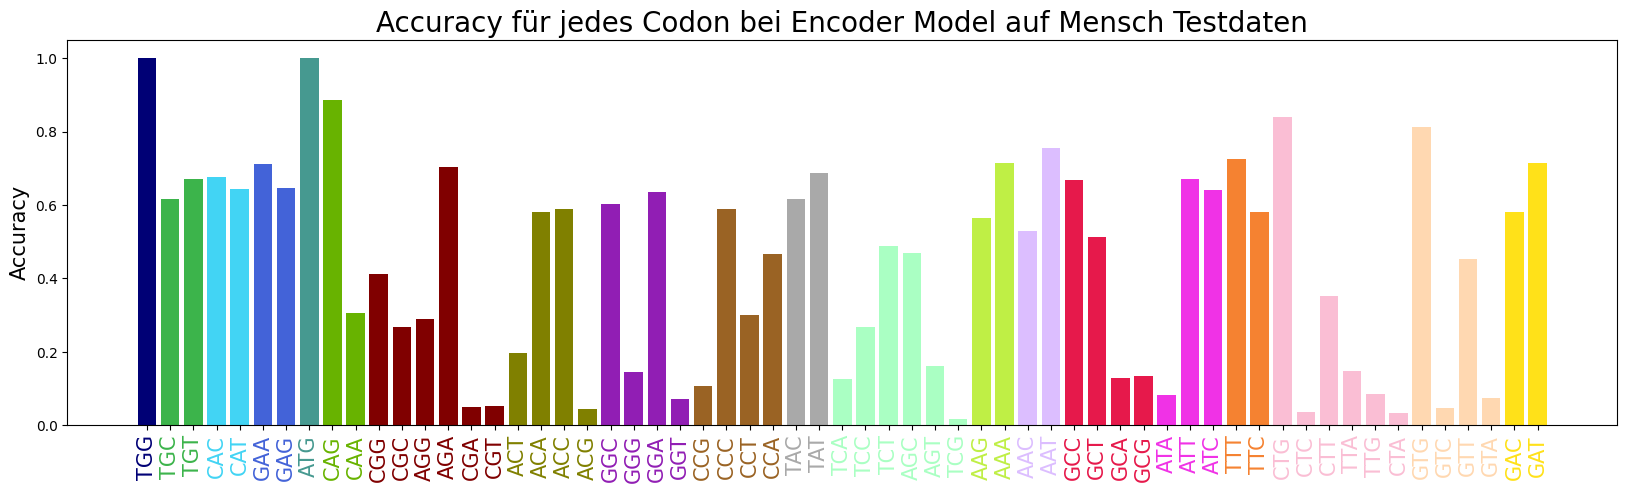

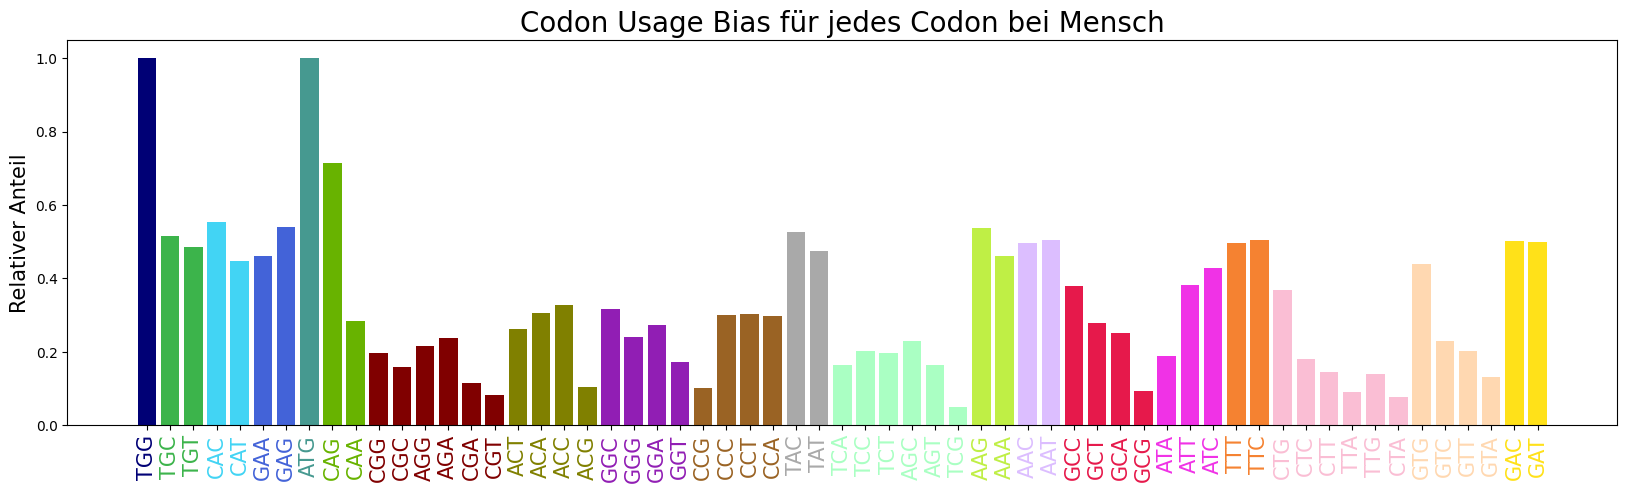

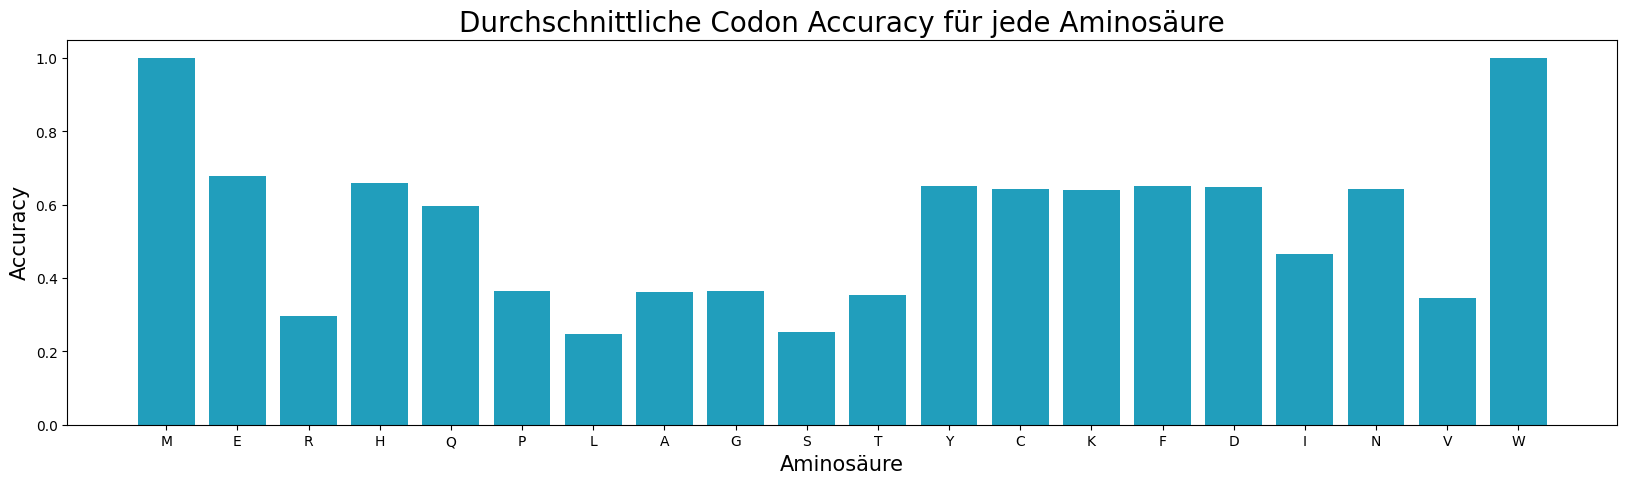

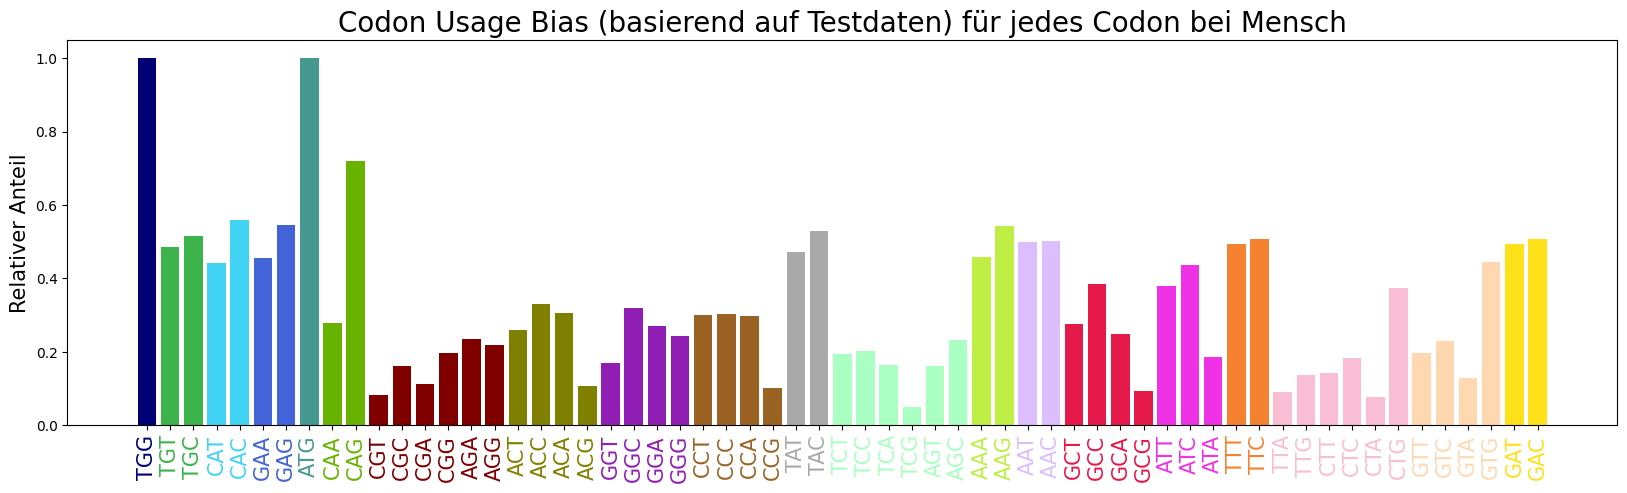

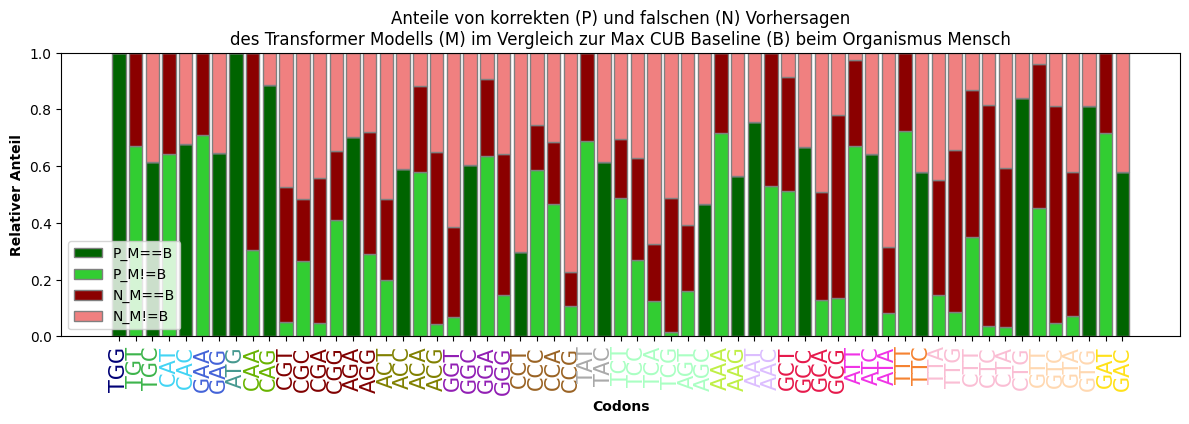

In [152]:
%run ./Encoder_Result_Visualisation.ipynb